In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

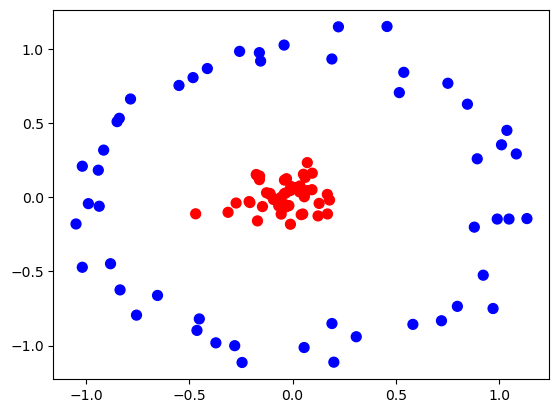

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Subhan\AppData\Local\Temp\ipykernel_19388\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


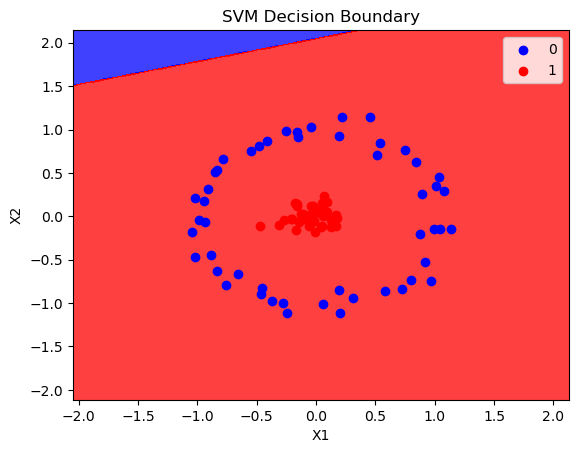

In [8]:
plot_decision_boundary(X, y, classifier)


In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

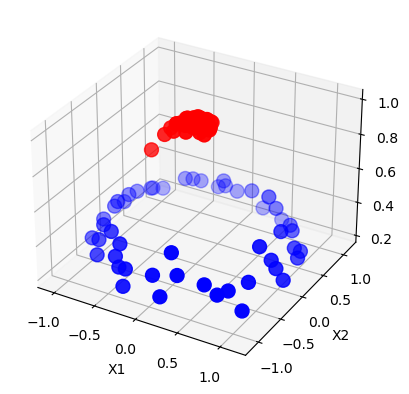

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Subhan\AppData\Local\Temp\ipykernel_19388\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


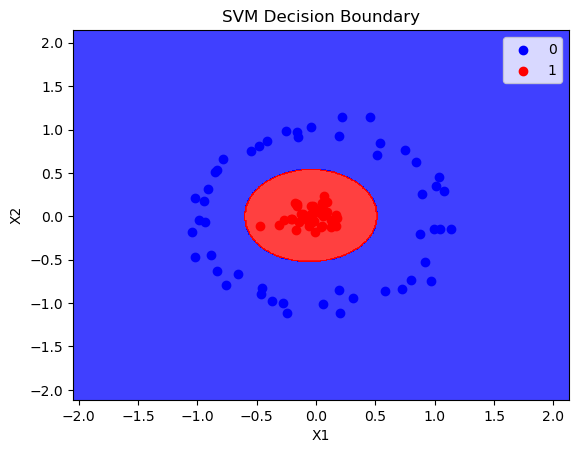

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [20]:
poly_classifier = SVC(kernel="poly",degree=5)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [21]:

accuracy_score(y_test, y_pred)

0.45

C:\Users\Subhan\AppData\Local\Temp\ipykernel_19388\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


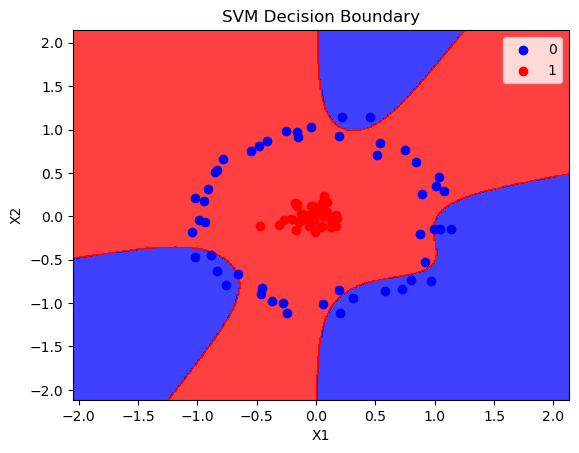

In [22]:
plot_decision_boundary(X, y, poly_classifier)

In [23]:
X

array([[ 0.98991791, -0.1477159 ],
       [ 0.72011012, -0.83298981],
       [ 0.18988913,  0.93082064],
       [ 0.17843258, -0.01937122],
       [-0.45152817, -0.82069412],
       [ 1.13356243, -0.14450634],
       [-0.9357824 , -0.06150251],
       [ 0.30777536, -0.94072475],
       [ 0.12288027, -0.12654668],
       [-0.0090807 ,  0.07281525],
       [-1.0480798 , -0.18086173],
       [-0.8811287 , -0.44872858],
       [ 0.12814359, -0.04224747],
       [ 0.53775178,  0.84081757],
       [-0.28028459, -1.0010026 ],
       [-0.04042946,  0.02334264],
       [ 0.58177697, -0.85737545],
       [-0.98826096, -0.04391079],
       [ 0.87897859, -0.20230298],
       [-0.46293826, -0.89786401],
       [ 0.19026093, -0.85170639],
       [ 0.0607996 ,  0.13326865],
       [-0.05667879, -0.00216557],
       [-0.14606713, -0.06370942],
       [-1.01774611, -0.47263099],
       [ 0.03372729,  0.03528586],
       [ 1.03662283,  0.44983171],
       [-0.27353394, -0.03974499],
       [-0.03230332,

In [37]:
np.exp(-(X**2)).sum(1)

array([1.35375092, 1.09501583, 1.38503557, 1.96828814, 1.32546304,
       1.25599505, 1.41279961, 1.32235186, 1.96912735, 1.99462951,
       1.30119859, 1.27768508, 1.98193005, 1.24201373, 1.29158924,
       1.99782206, 1.19232515, 1.37464054, 1.42170893, 1.25366637,
       1.44857719, 1.97870649, 1.99678798, 1.97483972, 1.1547506 ,
       1.9976188 , 1.15824894, 1.92633132, 1.99812904, 1.99303673,
       1.95921113, 1.94922328, 1.24324038, 0.95990717, 1.99302858,
       1.96699978, 1.22009118, 1.94653817, 1.31268981, 1.98392363,
       1.07836852, 1.99639436, 1.29708224, 1.98385201, 1.31548115,
       1.3379482 , 1.99553496, 1.37500616, 1.35504198, 1.98448242,
       1.4077178 , 1.18553162, 1.99273809, 1.99203438, 1.34834039,
       1.98739743, 1.23093237, 1.11159504, 1.98479364, 1.98533382,
       1.94236275, 1.97383976, 1.18630551, 1.36206867, 1.31744374,
       1.9961581 , 1.30672548, 1.99577142, 1.25249153, 1.24916973,
       1.99431928, 1.9607129 , 1.99790129, 1.99680773, 1.96535

In [27]:
X_new = [[1,2], [3,4]]

In [31]:
X_new = np.array(X_new)


In [38]:
X_new.sum(0) #[1,2], [3,4] it will add 1+3 and 2+4(0 axis).

array([4, 6])

In [34]:
X_new.sum(1) #[1,2], [3,4] it will add 1+2 and 3+4(1 axis).

array([3, 7])

In [39]:
X_new = np.exp(-(X**2))

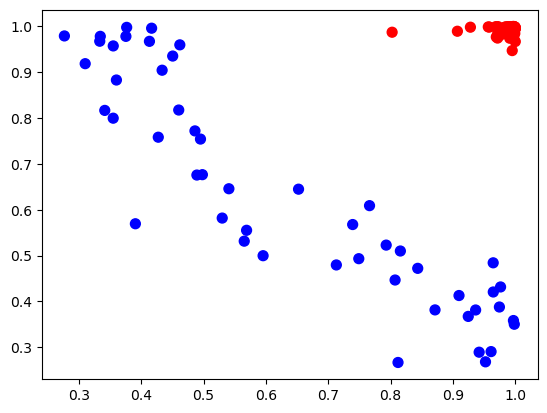

In [40]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')